In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pylab import rcParams
from sklearn import preprocessing

import scipy
from scipy.stats.stats import pearsonr

In [2]:
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 5 , 4
sns.set_style('whitegrid')

In [3]:
Transit_Reviews=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])
Transit_Reviews = Transit_Reviews.drop_duplicates()
Transit_Reviews.index = pd.RangeIndex(start=0, stop=len(Transit_Reviews), step=1)
Transit_Reviews.to_csv('transitfinal_100m.csv')
Transit=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])



In [4]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv",usecols=['Hotel_Name','Reviewer_Score'])
Hotel_Reviews.head()

,Hotel_Name,Reviewer_Score
0,Hotel Arena,2.9
1,Hotel Arena,7.5
2,Hotel Arena,7.1
3,Hotel Arena,3.8
4,Hotel Arena,6.7


In [5]:
Hotel_name=np.array([])
mean_reviewer_score=np.array([])

In [6]:
Hotels=Hotel_Reviews.Hotel_Name.unique()

In [7]:
for Hotel in Hotels:
    TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']==Hotel]
    TEMP=TEMP.reset_index()
    Hotel_name=np.append(Hotel_name,Hotel)
    
    mean_reviewer_score=np.append(mean_reviewer_score, TEMP['Reviewer_Score'].mean())

In [8]:
column1=['Hotel_name','mean_reviewer_score']

In [9]:
data1=np.column_stack((Hotel_name, mean_reviewer_score))

In [10]:
HotelReviews=pd.DataFrame(data1, columns=column1)
HotelReviews['mean_reviewer_score']=pd.to_numeric(HotelReviews['mean_reviewer_score'])
HotelReviews=HotelReviews[['mean_reviewer_score']]
HotelReviews.head()

,mean_reviewer_score
0,7.836296
1,8.602827
2,9.298843
3,7.711469
4,8.848571


In [11]:
Connections=pd.concat([Transit_Reviews, HotelReviews], ignore_index=False, axis=1)
Connect = Connections[Connections.transit_count!='-']

Connect['transit_count']=Connect['transit_count'].astype(str).astype(int)
Connect

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hotel_Name,transit_count,Review_Count,mean_reviewer_score
0,Hotel Arena,0,405.0,7.836296
1,K K Hotel George,1,566.0,8.602827
2,Apex Temple Court Hotel,2,1037.0,9.298843
3,The Park Grand London Paddington,0,1770.0,7.711469
4,Monhotel Lounge SPA,0,35.0,8.848571
5,Kube Hotel Ice Bar,2,19.0,5.852632
6,The Principal London,2,1425.0,8.029333
7,Park Plaza County Hall London,2,2223.0,8.369546
8,One Aldwych,3,136.0,9.144853
9,Splendid Etoile,8,127.0,9.142520


In [12]:
TransitGroups=Connect.transit_count.unique()

In [13]:
TransitGroups.size

17

In [14]:
Connect['transit_count'].value_counts().sort_values(ascending=False)

0     562
1     341
2     185
3     157
4     101
5      47
6      28
8      20
7      18
10      6
9       4
14      2
17      2
16      1
18      1
13      1
19      1
Name: transit_count, dtype: int64

In [15]:
bins = [-1, 0, 2, 4, 6, 8, 20]
groups=Connect.groupby(['transit_count',pd.cut(Connect.transit_count, bins)])
Transits = groups.size().unstack().sum()
Transits

transit_count
(-1, 0]    562.0
(0, 2]     526.0
(2, 4]     258.0
(4, 6]      75.0
(6, 8]      38.0
(8, 20]     18.0
dtype: float64

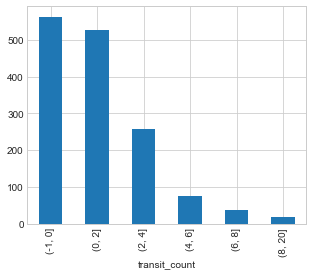

In [16]:
Transits.plot('bar')
plt.show()

In [17]:
Con1 = Connect[Connect.transit_count==0].mean_reviewer_score.mean()
Con1

8.492160449427232

In [18]:
Con2 = Connect[(Connect['transit_count']>0) & (Connect['transit_count']<5)].mean_reviewer_score.mean()
Con2

8.451592721307414

In [19]:
Con3 = Connect[(Connect['transit_count']>4) & (Connect['transit_count']<7)].mean_reviewer_score.mean()
Con3

8.322563808278558

In [20]:
Con4 = Connect[(Connect['transit_count']>6) & (Connect['transit_count']<9)].mean_reviewer_score.mean()
Con4

8.64493288907558

In [21]:
Con5 = Connect[(Connect['transit_count']>8) & (Connect['transit_count']<11)].mean_reviewer_score.mean()
Con5

8.928118227884898

In [22]:
Con6 = Connect[(Connect['transit_count']>10) & (Connect['transit_count']<13)].mean_reviewer_score.mean()
Con6

nan

In [23]:
Con7 = Connect[(Connect['transit_count']>12) & (Connect['transit_count']<15)].mean_reviewer_score.mean()
Con7

8.125826376666158

In [24]:
Con8 = Connect[(Connect['transit_count']>14) & (Connect['transit_count']<17)].mean_reviewer_score.mean()
Con8

8.271559633027525

In [25]:
Con9 = Connect[(Connect['transit_count']>16) & (Connect['transit_count']<19)].mean_reviewer_score.mean()
Con9

8.578075048732941

In [26]:
Con10 = Connect[(Connect['transit_count']>18) & (Connect['transit_count']<21)].mean_reviewer_score.mean()
Con10

8.642391304347827

In [28]:
Hotel_City_Reviews=pd.read_csv("Hotel_Info_Country_City.csv", usecols=['Hotel_Name','City'])

In [29]:
Barcelona=Hotel_City_Reviews.loc[Hotel_City_Reviews['City']=='Barcelona']
len(Barcelona.Hotel_Name.unique())

211

In [30]:
hotels_zero_transit=pd.DataFrame(Connect[Connect.transit_count==0].Hotel_Name)


In [31]:
Hotel_Barcelona = hotels_zero_transit[hotels_zero_transit['Hotel_Name'].isin(Barcelona.Hotel_Name.unique())]
Hotel_Barcelona

,Hotel_Name
798,Eurostars Angli
806,Catalonia Catedral
814,H10 Marina Barcelona
829,Crowne Plaza Barcelona Fira Center
831,H10 Itaca
832,Hotel Abbot
834,Melia Barcelona Sarri
839,Aparthotel Arai 4 Superior
851,Hotel Regina
852,Hotel Pulitzer


In [32]:
import langid
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LiverJoker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv")
TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name'].isin(Hotel_Barcelona.Hotel_Name.unique())]
len(TEMP)

17757

In [35]:
corpusP= []
corpusN= []
uniqueUsefulTokens= set()

for i in TEMP.index:
       reviewP=""
       reviewN="" 
       if ("No Negative" in TEMP['Negative_Review'][i]) and "No Positive" in TEMP['Positive_Review'][i]:
            continue
       elif "No Negative" in TEMP['Negative_Review'][i]:
            reviewP = TEMP['Positive_Review'][i]
       else:
            reviewN = TEMP['Negative_Review'][i]
       
       if (langid.classify(reviewP)[0]!='en' and langid.classify(reviewN)[0]!='en'):
            continue
       reviewP= re.sub('[^a-zA-Z]', ' ', reviewP)
       reviewN= re.sub('[^a-zA-Z]', ' ', reviewN)

       reviewP=reviewP.lower().split()
       reviewN=reviewN.lower().split()

       ps=PorterStemmer()
       reviewP  = [ps.stem(word) for word in reviewP if not word in set(stopwords.words('english'))]
       reviewN  = [ps.stem(word) for word in reviewN if not word in set(stopwords.words('english'))]
       for word in reviewP:
            uniqueUsefulTokens.add(word)
       reviewP = ' '.join(reviewP)
    
       for word in reviewN:
            uniqueUsefulTokens.add(word)
       reviewN = ' '.join(reviewN)
    
       if reviewP!="":
            corpusP.append(reviewP)
        
    
       if reviewN!="":
            corpusN.append(reviewN)
            

In [36]:
len(corpusN)

13030

In [37]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

def computeIDF(docList):
    import math
    ifdDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val>0:
                idfDict[word] +=1
            
    for word, val in idfDict.items():
        idfDict[word] = math.log(N/float(val))
        
    return idfDict

def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [38]:
from functools import reduce

In [39]:
bowA = []
for line in corpusN:
    line= re.sub('[^a-zA-Z]', ' ', line)
    bowA.append(line.split(" "))

bowAnew = reduce(lambda x,y: x+y,bowA)
len(bowA)

13030

In [40]:
wordSet=set(bowAnew)
wordSet

{'inquir',
 'taverna',
 'taller',
 'averi',
 'per',
 'cctv',
 'immediatley',
 'bandwidth',
 'burnt',
 'six',
 'btw',
 'unfortun',
 'escal',
 'row',
 'empti',
 'outstand',
 'eco',
 'transit',
 'vapor',
 'ller',
 'boqueria',
 'card',
 'swap',
 'weigh',
 'thingi',
 'terrac',
 'creaki',
 'simultan',
 'waist',
 'interestingli',
 'attende',
 'reverber',
 'confirm',
 'transform',
 'ce',
 'rosellon',
 'cushion',
 'catcher',
 'visa',
 'crazi',
 'minuscul',
 'new',
 'whiski',
 'move',
 'everi',
 'tenni',
 'alley',
 'buffet',
 'ship',
 'lane',
 'bathrob',
 'famous',
 'beuffet',
 'laundari',
 'hotter',
 'imho',
 'aviod',
 'drawback',
 'hottub',
 'penni',
 'prblem',
 'unqualifi',
 'eas',
 'suggest',
 'gaudi',
 'nicer',
 'impos',
 'nt',
 'plainer',
 'barcalona',
 'ra',
 'harbor',
 'lake',
 'nudist',
 'estim',
 'fascil',
 'period',
 'rather',
 'exhibit',
 'needless',
 'convers',
 'minor',
 'central',
 'esp',
 'foreign',
 'basement',
 'find',
 'dsi',
 'bowl',
 'sill',
 'danger',
 'bent',
 'relish',
 '

In [41]:
wordDictAarr = np.array([])
for listbowA in bowA:
    wordDictA = dict.fromkeys(wordSet,0)
    for word in listbowA:
        wordDictA[word]+=1
    wordDictAarr = np.append(wordDictAarr, wordDictA)

In [42]:
i = 0
tfBowAarr = np.array([])
for listbowA in bowA:
    tfBowA = computeTF(wordDictAarr[i], listbowA)
    i +=1
    tfBowAarr = np.append(tfBowAarr, tfBowA)
tfBowAarr

array([ {'inquir': 0.0, 'taverna': 0.0, 'taller': 0.0, 'averi': 0.0, 'per': 0.0, 'cctv': 0.0, 'immediatley': 0.0, 'bandwidth': 0.0, 'burnt': 0.0, 'six': 0.0, 'btw': 0.0, 'unfortun': 0.0, 'escal': 0.0, 'row': 0.0, 'empti': 0.0, 'outstand': 0.0, 'eco': 0.0, 'transit': 0.0, 'vapor': 0.0, 'ller': 0.0, 'boqueria': 0.0, 'card': 0.0, 'swap': 0.0, 'weigh': 0.0, 'thingi': 0.0, 'terrac': 0.0, 'creaki': 0.0, 'simultan': 0.0, 'waist': 0.0, 'interestingli': 0.0, 'attende': 0.0, 'reverber': 0.0, 'confirm': 0.0, 'transform': 0.0, 'ce': 0.0, 'rosellon': 0.0, 'cushion': 0.0, 'catcher': 0.0, 'visa': 0.0, 'crazi': 0.0, 'minuscul': 0.0, 'new': 0.0, 'whiski': 0.0, 'move': 0.0, 'everi': 0.0, 'tenni': 0.0, 'alley': 0.0, 'buffet': 0.0, 'ship': 0.0, 'lane': 0.0, 'bathrob': 0.0, 'famous': 0.0, 'beuffet': 0.0, 'laundari': 0.0, 'hotter': 0.0, 'imho': 0.0, 'aviod': 0.0, 'drawback': 0.0, 'hottub': 0.0, 'penni': 0.0, 'prblem': 0.0, 'unqualifi': 0.0, 'eas': 0.0, 'suggest': 0.0, 'gaudi': 0.0, 'nicer': 0.0, 'impos': 0.

In [43]:
idfs = computeIDF(wordDictAarr)
idfsData = pd.DataFrame.from_dict(idfs, orient='index', dtype=float)
idfsData[0]=1/idfsData[0]

PosRev = pd.DataFrame(idfsData[0].sort_values(ascending=False))
PositiveReviews = PosRev.iloc[0:10, :]
PositiveReviews

,0
room,0.895218
hotel,0.580493
breakfast,0.464006
noth,0.436175
staff,0.411357
small,0.407807
could,0.399017
would,0.389825
bed,0.385107
pool,0.375408
